#### CÓDIGO ORIGINAL:

In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

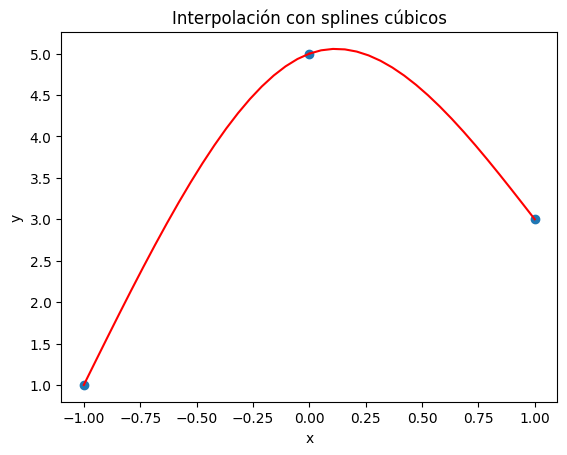

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

#### CÓDIGO CORREGIDO:

S0(x) = 1 + 5.5*(x - -1) + 0*(x - -1)^2 + -1.5*(x - -1)^3
S1(x) = 5 + 1.0*(x - 0) + -4.5*(x - 0)^2 + 1.5*(x - 0)^3


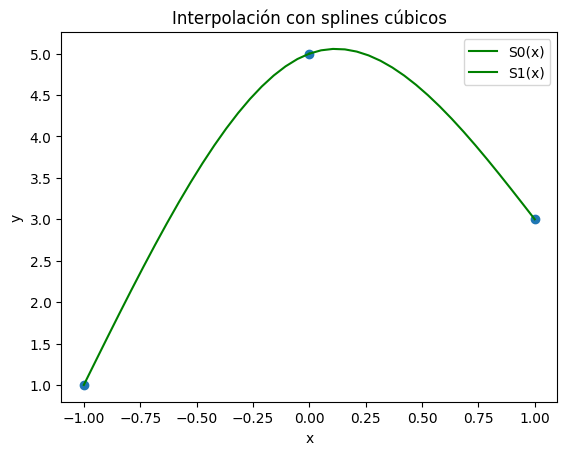

In [9]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]

# Ajustamos los coeficientes para que S0'(X1) = S1'(X1)
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]

# Calculamos las derivadas en x1
def Spline_derivative(x: float, x0: float, pars: dict[str, float]) -> float:
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return b + 2 * c * (x - x0) + 3 * d * (x - x0) ** 2

# Ajustamos b de S1 para que coincida con la derivada de S0 en x1
s[1]["b"] = Spline_derivative(xs[1], xs[0], s[0])

for i, x_i in enumerate(xs[:-1]):
    a = s[i]["a"]
    b = s[i]["b"]
    c = s[i]["c"]
    d = s[i]["d"]
    print(f"S{i}(x) = {a} + {b}*(x - {x_i}) + {c}*(x - {x_i})^2 + {d}*(x - {x_i})^3")

for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, label=f'S{i}(x)', color="green")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.legend()
plt.show()